<a href="https://colab.research.google.com/github/2xazo/ML/blob/main/BoughtiPhone_using_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

dataset = pd.read_csv("iPhone.csv")
dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3].values

In [4]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_gender =  LabelEncoder()

In [7]:
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
dataset.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)

[[63  5]
 [ 3 29]]
Accuracy score: 0.92
Precision score: 0.8529411764705882
Recall score: 0.90625


<Axes: >

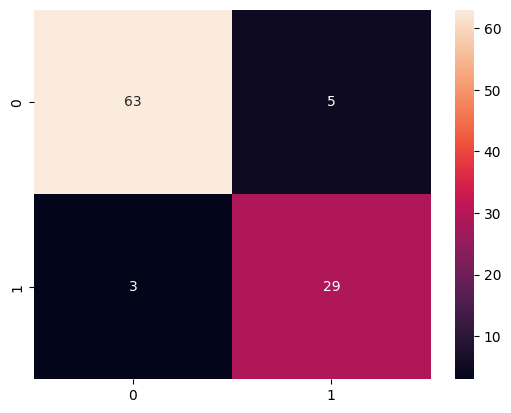

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [15]:
person1 = sc.transform([[1,21,40000]])
person2 = sc.transform([[0,41,110000]])
person3 = sc.transform([[0,41,80000]])

print("Male aged 21 making $40k will buy iPhone:", classifier.predict(person1))
print("Female aged 41 making $110k will buy iPhone:", classifier.predict(person2))
print("Female aged 41 making $80k will buy iPhone:", classifier.predict(person3))

Male aged 21 making $40k will buy iPhone: [0]
Female aged 41 making $110k will buy iPhone: [1]
Female aged 41 making $80k will buy iPhone: [0]


In [16]:
if classifier.predict(person1) == 0:
    print("Male aged 21 making $40k: Will not purchase iPhone")
else:
    print("Male aged 21 making $40k: Will purchase iPhone")

if classifier.predict(person2) == 0:
    print("Female aged 41 making $110k: Will not purchase iPhone")
else:
    print("Female aged 41 making $110k: Will purchase iPhone")

if classifier.predict(person3) == 0:
    print("Female aged 41 making $80k: Will not purchase iPhone")
else:
    print("Female aged 41 making $80k: Will purchase iPhone")

Male aged 21 making $40k: Will not purchase iPhone
Female aged 41 making $110k: Will purchase iPhone
Female aged 41 making $80k: Will not purchase iPhone


In [17]:
print("Male aged 21 making $40k will buy iPhone:", classifier.predict_proba(person1))
print("Female aged 41 making $110k will buy iPhone:", classifier.predict_proba(person2))
print("Female aged 41 making $80k will buy iPhone:", classifier.predict_proba(person3))

Male aged 21 making $40k will buy iPhone: [[1. 0.]]
Female aged 41 making $110k will buy iPhone: [[0. 1.]]
Female aged 41 making $80k will buy iPhone: [[1. 0.]]
